In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [10]:
%matplotlib inline
%time

Wall time: 0 ns


In [4]:
warnings.filterwarnings(action='ignore')

In [6]:
train = pd.read_csv("data/train.csv")
print(train.shape)
train.head()

(810000, 230)


,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810000 entries, 0 to 809999
Columns: 230 entries, layer_1 to 225
dtypes: float64(226), int64(4)
memory usage: 1.4 GB


In [8]:
train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,86.554468,86.554468,86.554468,86.554468,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,10.000000,10.000000,10.000000,10.000000,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,80.000000,80.000000,80.000000,80.000000,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,155.000000,155.000000,155.000000,155.000000,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,230.000000,230.000000,230.000000,230.000000,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,300.000000,300.000000,300.000000,300.000000,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [9]:
dir(train)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [13]:
isna = train.isnull().sum()
isna[isna>0]

Series([], dtype: int64)

<AxesSubplot:ylabel='Density'>

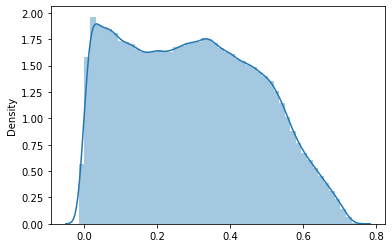

In [18]:
wave_0_df = train.iloc[:,4:5]
sns.distplot(wave_0_df, kde=True) # 커널밀도
plt.show()